In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [0]:
from google.colab import files 
uploaded = files.upload()

In [0]:
raw_data = pd.read_csv('World_Happiness_2015_2017.csv')

In [0]:
raw_data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [0]:
raw_data.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.175605,0.201426,2.092717,2015.993617
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.131909,0.133211,0.565772,0.816907
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.075792,0.098303,1.737975,2015.000000
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.139081,0.181624,2.094640,2016.000000
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.249839,0.275505,2.455575,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710,3.837720,2017.000000


In [0]:
raw_data.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

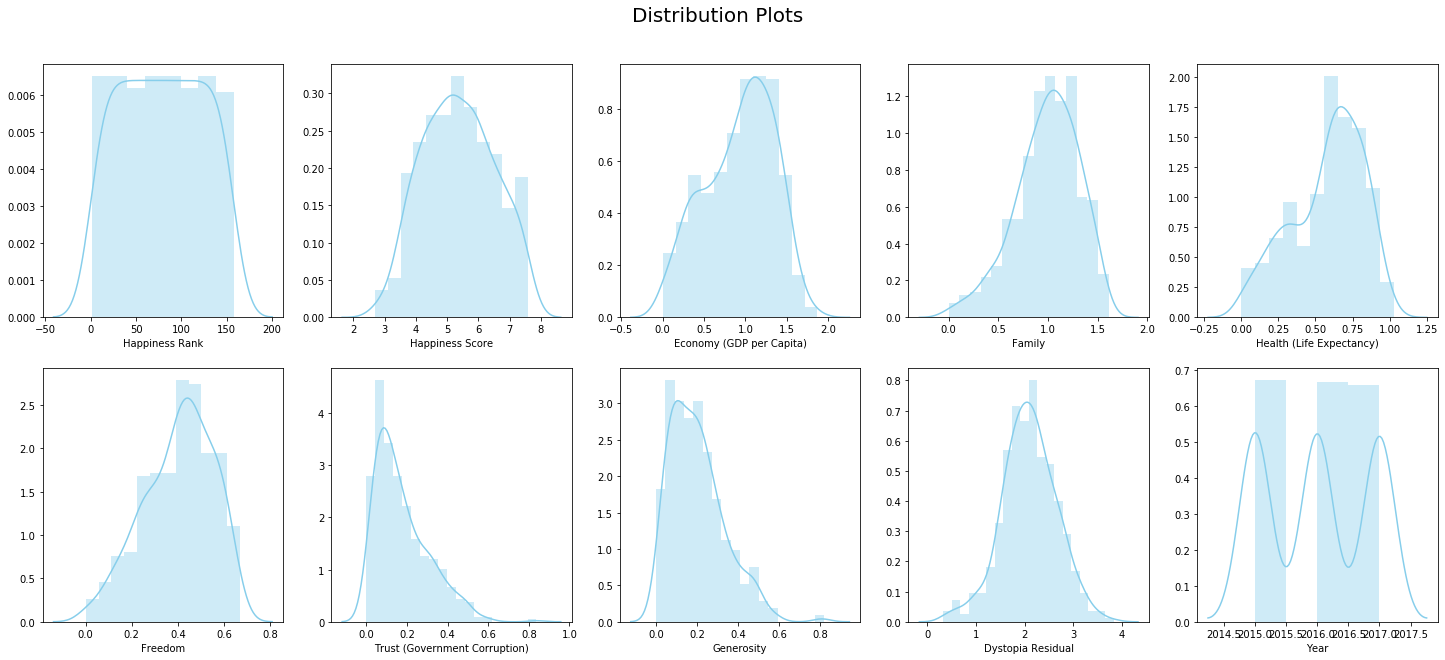

In [0]:

columns = raw_data.describe().columns
f, axes = plt.subplots(2, 5, figsize=(25, 10))
for ax, feature in zip(axes.flat, columns):
    sns.distplot(raw_data[feature] , color="skyblue", ax=ax)

f.suptitle('Distribution Plots', fontsize=20)
f.subplots_adjust(top= 0.9)

As you can see from these distribution plots there are a few that are skewed indicating presence of outliers. The ranking data is not expected to be normally distributed. The year graph behavior is explained by the number of samples collected for each year we don't really expect that to be normally distributed also. Interesting to note that Happiness Score and Dystopia Residual are the only two that seem to be shaped like a bell curve.

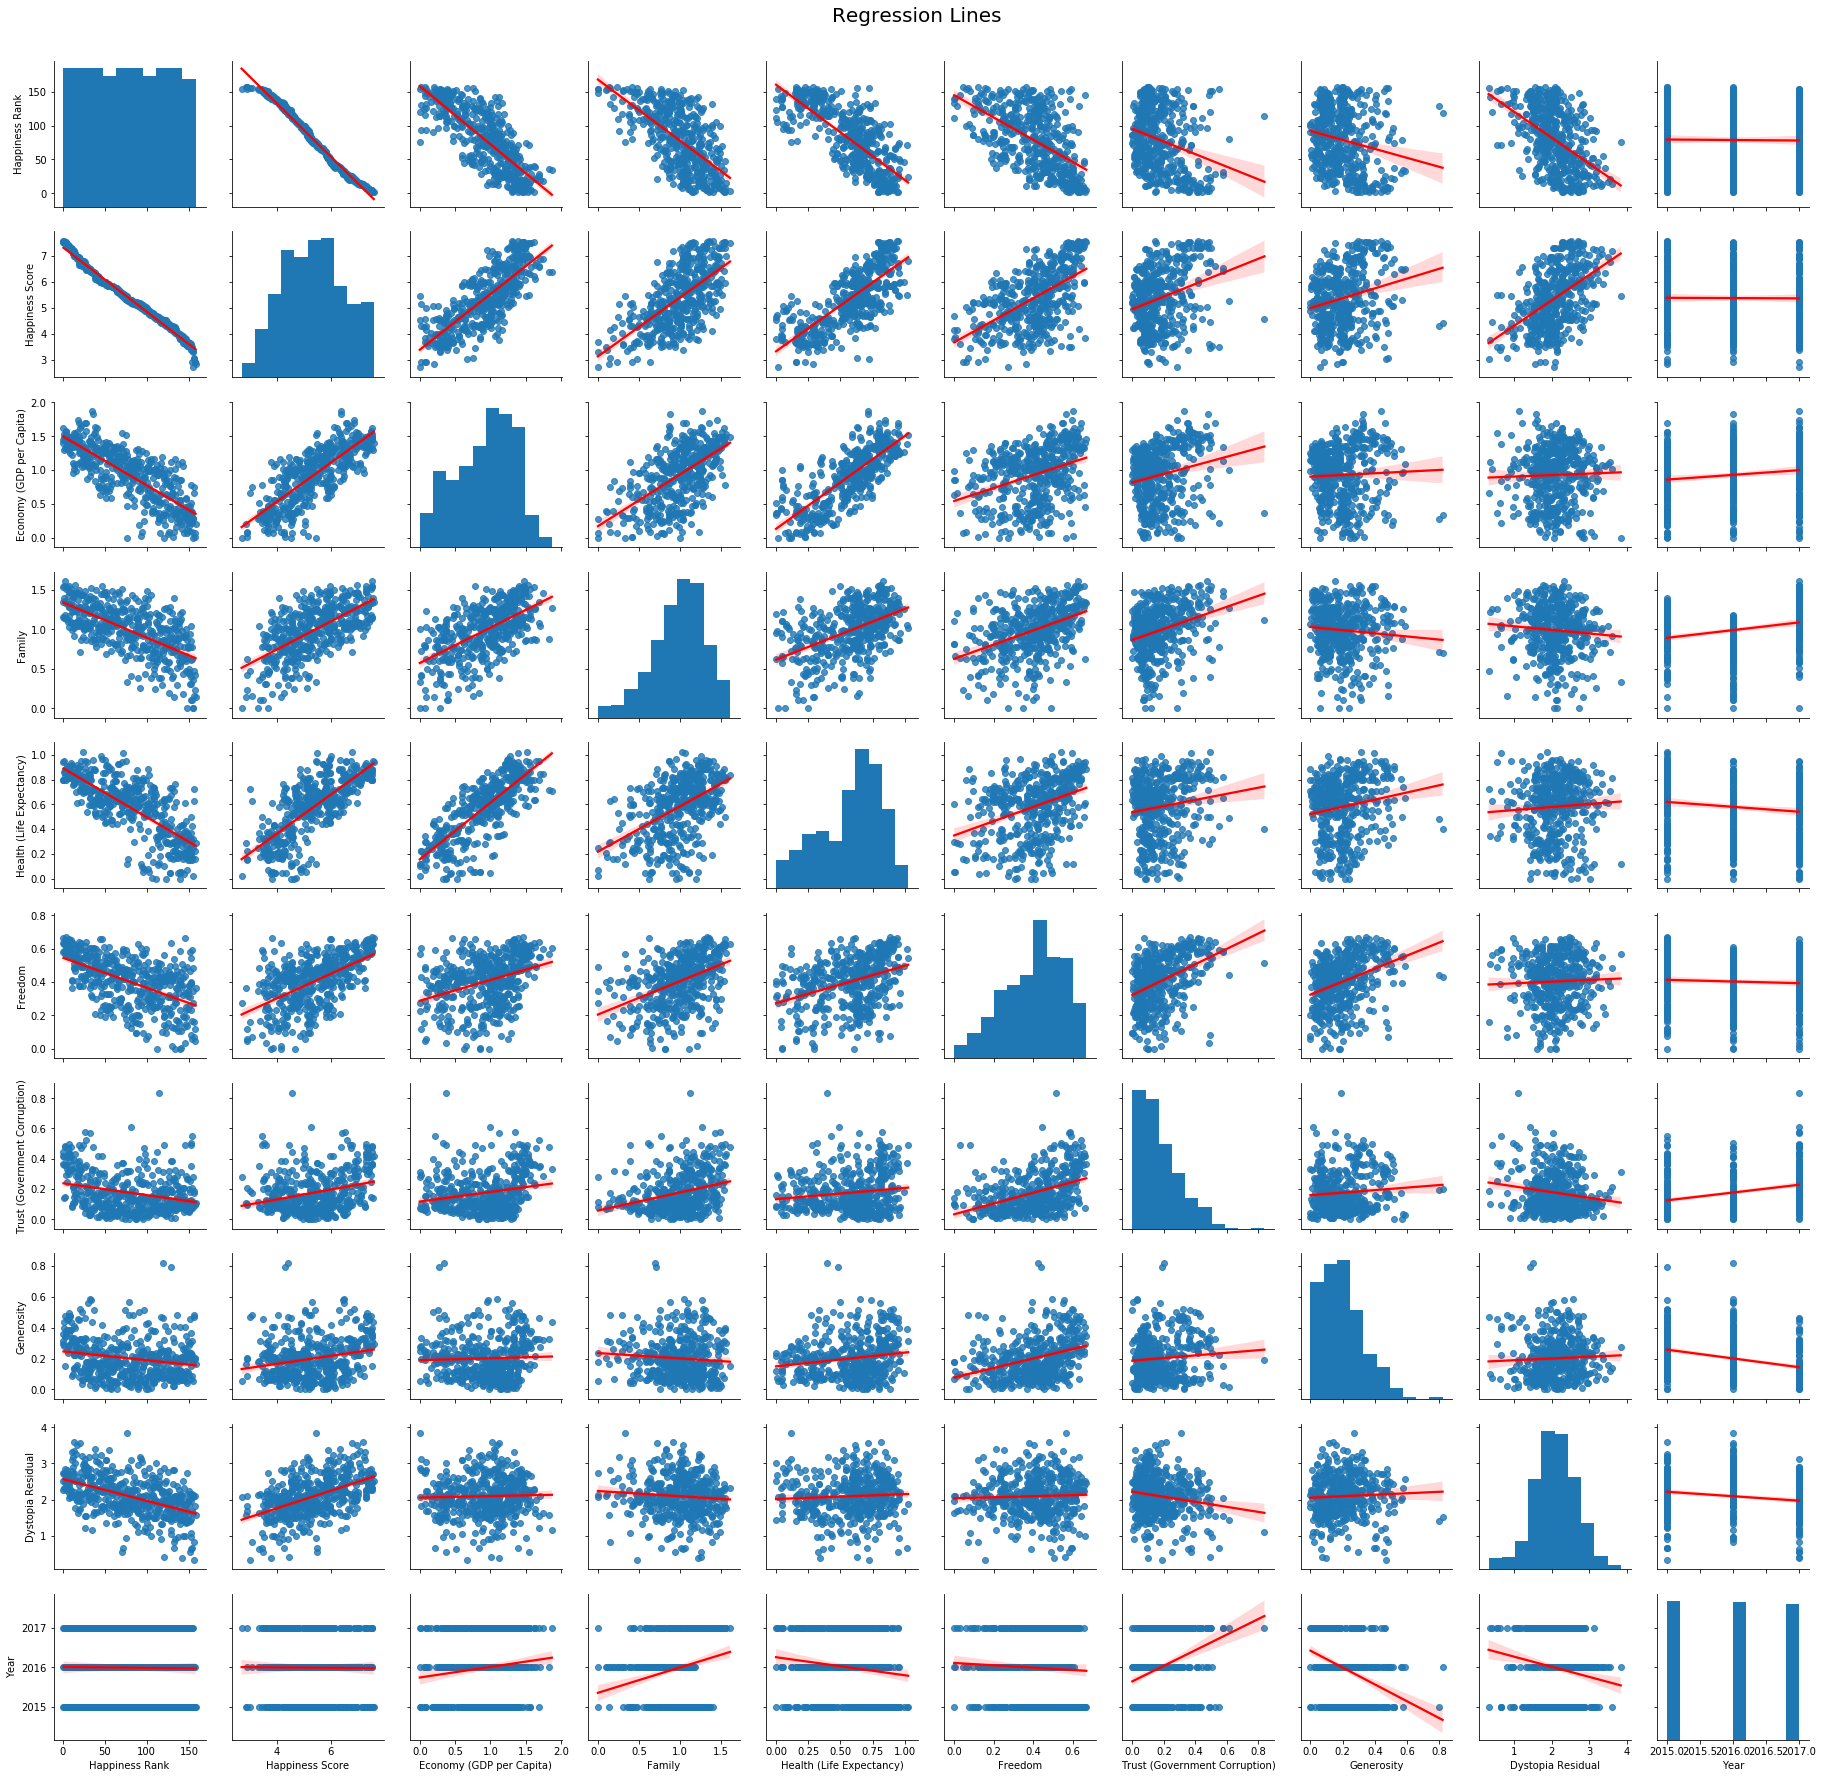

In [0]:
plot = sns.pairplot(raw_data, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plot.fig.suptitle('Regression Lines', fontsize=20)
plot.fig.subplots_adjust(top=0.95)

We can see all the regression lines here at once which makes it easy to spot linear replationships. There are quite a few pairs which are not linearly related at all.

# Correlation Table

For this section my lack of practice with stats really shows so I was researching this quite a bit. From my understanding Pearson is affected by outliers quite a bit and so I thought that would be bad to use. I considered Spearman next which I thought would be a good fit for this dataset as it is not affected by outliers that much. Also to note we could remove outliers and that would really solve our porblem. 

In [0]:
corr_table = raw_data.corr('spearman')
corr_table

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Happiness Rank,1.000000,-0.998970,-0.801924,-0.635794,-0.759233,-0.555039,-0.258704,-0.201530,-0.490268,-0.013359
Happiness Score,-0.998970,1.000000,0.800252,0.627502,0.760712,0.554569,0.252305,0.210067,0.497739,-0.002154
Economy (GDP per Capita),-0.801924,0.800252,1.000000,0.584480,0.803493,0.374744,0.200831,0.056290,0.070809,0.140618
Family,-0.635794,0.627502,0.584480,1.000000,0.490872,0.454714,0.306214,-0.105372,-0.077108,0.267470
Health (Life Expectancy),-0.759233,0.760712,0.803493,0.490872,1.000000,0.382680,0.111159,0.172975,0.102379,-0.151467
Freedom,-0.555039,0.554569,0.374744,0.454714,0.382680,1.000000,0.423819,0.376593,0.048817,-0.045556
Trust (Government Corruption),-0.258704,0.252305,0.200831,0.306214,0.111159,0.423819,1.000000,0.023775,-0.111537,0.347216
Generosity,-0.201530,0.210067,0.056290,-0.105372,0.172975,0.376593,0.023775,1.000000,0.146708,-0.400917
Dystopia Residual,-0.490268,0.497739,0.070809,-0.077108,0.102379,0.048817,-0.111537,0.146708,1.000000,-0.190656
Year,-0.013359,-0.002154,0.140618,0.267470,-0.151467,-0.045556,0.347216,-0.400917,-0.190656,1.000000


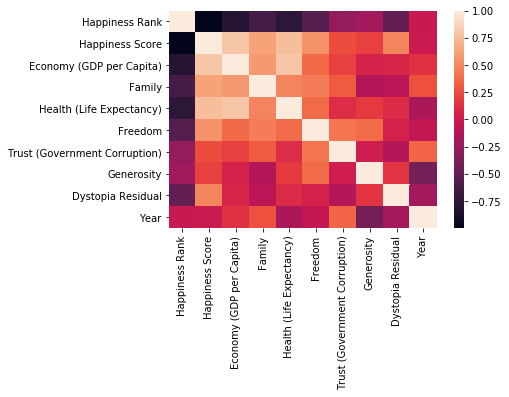

In [0]:
sns.heatmap(corr_table)

# R<sup>2</sup> Table

In [0]:
corr_table_R2 = corr_table ** 2
corr_table_R2

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Happiness Rank,1.000000,0.997942,0.643083,0.404234,0.576434,0.308068,0.066928,0.040614,0.240363,0.000178
Happiness Score,0.997942,1.000000,0.640403,0.393758,0.578682,0.307546,0.063658,0.044128,0.247744,0.000005
Economy (GDP per Capita),0.643083,0.640403,1.000000,0.341617,0.645602,0.140433,0.040333,0.003169,0.005014,0.019773
Family,0.404234,0.393758,0.341617,1.000000,0.240955,0.206765,0.093767,0.011103,0.005946,0.071540
Health (Life Expectancy),0.576434,0.578682,0.645602,0.240955,1.000000,0.146444,0.012356,0.029920,0.010481,0.022942
Freedom,0.308068,0.307546,0.140433,0.206765,0.146444,1.000000,0.179622,0.141822,0.002383,0.002075
Trust (Government Corruption),0.066928,0.063658,0.040333,0.093767,0.012356,0.179622,1.000000,0.000565,0.012440,0.120559
Generosity,0.040614,0.044128,0.003169,0.011103,0.029920,0.141822,0.000565,1.000000,0.021523,0.160734
Dystopia Residual,0.240363,0.247744,0.005014,0.005946,0.010481,0.002383,0.012440,0.021523,1.000000,0.036350
Year,0.000178,0.000005,0.019773,0.071540,0.022942,0.002075,0.120559,0.160734,0.036350,1.000000


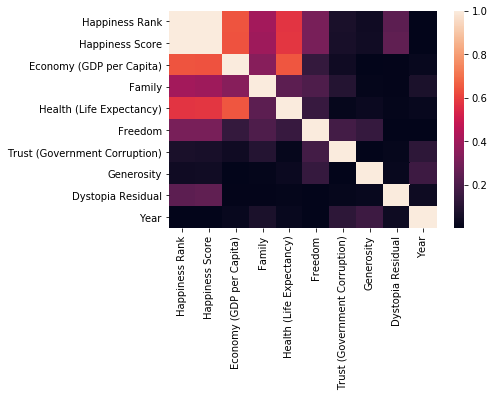

In [0]:
sns.heatmap(corr_table_R2)

In [0]:
filter_values = corr_table_R2
temp = filter_values > 0.2
filter_values[temp]

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Happiness Rank,1.000000,0.997942,0.643083,0.404234,0.576434,0.308068,NaN,NaN,0.240363,NaN
Happiness Score,0.997942,1.000000,0.640403,0.393758,0.578682,0.307546,NaN,NaN,0.247744,NaN
Economy (GDP per Capita),0.643083,0.640403,1.000000,0.341617,0.645602,NaN,NaN,NaN,NaN,NaN
Family,0.404234,0.393758,0.341617,1.000000,0.240955,0.206765,NaN,NaN,NaN,NaN
Health (Life Expectancy),0.576434,0.578682,0.645602,0.240955,1.000000,NaN,NaN,NaN,NaN,NaN
Freedom,0.308068,0.307546,NaN,0.206765,NaN,1.000000,NaN,NaN,NaN,NaN
Trust (Government Corruption),NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Generosity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Dystopia Residual,0.240363,0.247744,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


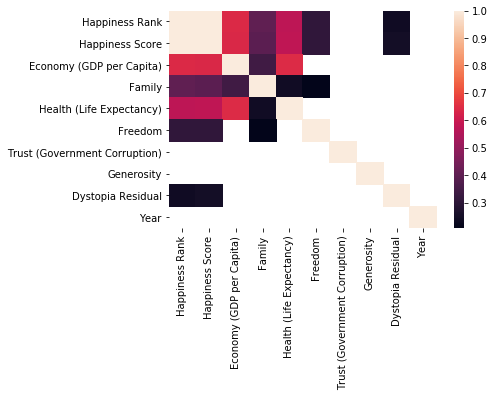

In [0]:
sns.heatmap(filter_values[temp])

As you can see from above the correlation between Freedom, Trust, Genorosity, Dystopia Residual and Year are very weak. Using this dataset we would have a hard time creating any predictive model for those features.

# Summary

The dataset can provide some interesting insights regarding happiness. I thought it was interesting that there was one point where the Trust was very high but happiness was rated low. It just shows you measuring the happiness of a population involves many complex factors. Looking at the correlation matrix you can really see a clear trend that Health, Family, and Freedom are some of the most important factors towards a person's happiness. Maybe this dataset can provide some interesting insights towards the way we should live and the things we value :)

## Sources Referenceed

Kendall Rank Correlation (https://towardsdatascience.com/kendall-rank-correlation-explained-dee01d99c535)

Spearman’s Rank Correlation (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/)

Pearson correlation (https://towardsdatascience.com/pearson-coefficient-of-correlation-explained-369991d93404)